In [2]:
pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/c0/da/977ded879c29cbd04de313843e76868e6e13408a94ed6b987245dc7c8506/openpyxl-3.1.5-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/c1/8b/5fe2cc11fee489817272089c4203e679c63b570a5aaeb18d852ae3cbba6a/et_xmlfile-2.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 393.8 kB/s eta 0:00:01
   -------------------------------- ------- 204.8/250.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


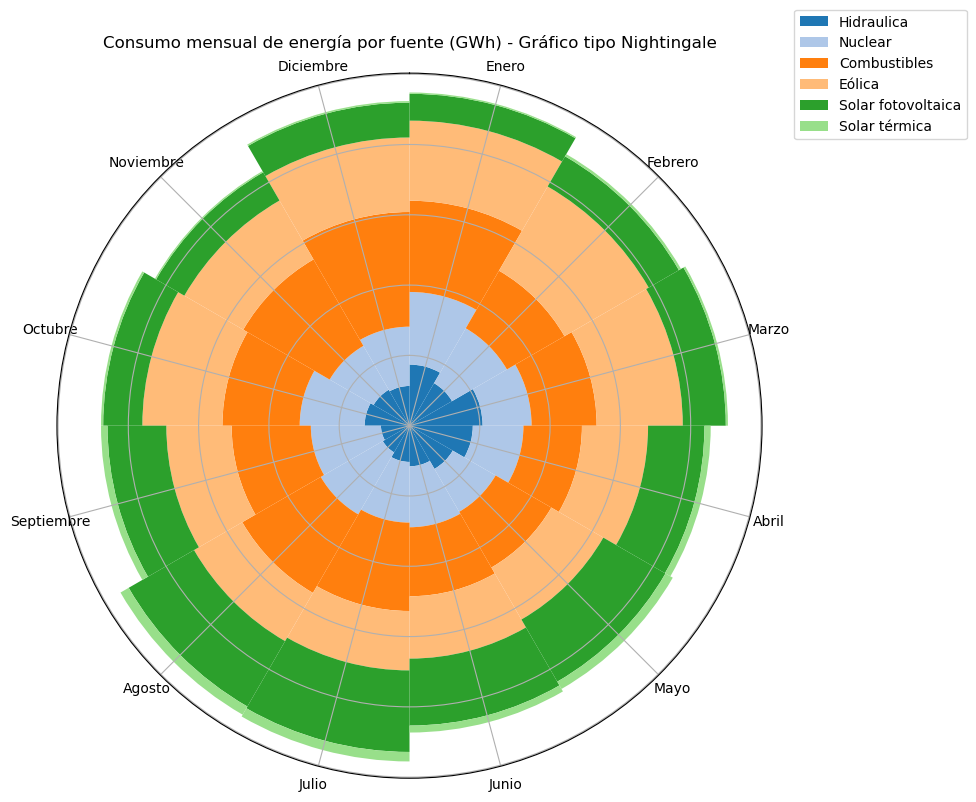

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargo los datos
archivo_excel = "Grafico_2_Python.xlsx"  
df = pd.read_excel(archivo_excel)

# Veo que la columna se llama mes
df.rename(columns={df.columns[0]: "Mes"}, inplace=True)

# Calculo las coordenadas
num_meses = df.shape[0]
angle_width = 2 * np.pi / num_meses
angles = np.arange(0, 2 * np.pi, angle_width)

# Creo el gráfico polar
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Inicializo el fondo desde el cual se apilan las barras
bottom = np.zeros(num_meses)

# Elijo los colors para ver la fuente
colores = plt.cm.tab20.colors[:df.shape[1] - 1]  # -1 por la columna de 'Mes'

# Dibujo cada fuente apilada por mes
for i, fuente in enumerate(df.columns[1:]): 
    valores = df[fuente].values
    ax.bar(angles, valores, width=angle_width, bottom=bottom, color=colores[i], label=fuente, align='edge')
    bottom += valores

# Ajustes del gráfico
ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)       
ax.set_xticks(angles + angle_width / 2)
ax.set_xticklabels(df["Mes"])
ax.set_yticklabels([])  #
ax.set_title("Consumo mensual de energía por fuente (GWh) - Gráfico tipo Nightingale", va='bottom')
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.savefig("grafico_nightingale.png", dpi=300, bbox_inches='tight')
plt.show()